In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import zscore

import string
import nltk
from nltk.corpus import  stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score

import joblib

In [2]:
df=pd.read_csv('train.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df1=pd.read_csv('test.csv')
df1

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
df.shape

(159571, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [7]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['id', 'comment_text']

 ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']


In [8]:
print('No of numerical features: ',len(nf))
print('No of categorical features: ',len(cf))

No of numerical features:  6
No of categorical features:  2


In [9]:
for col in cf:
    print(df[col].value_counts(),'\n')

00cc7f0622962160    1
f695f072eb0c21c9    1
749a1e0a94756990    1
d6c990ab425124a5    1
0cf1ec305a1d306d    1
                   ..
582830cd4496fc6d    1
b14d2f04893f811c    1
30e304e8c6eebda5    1
977154835454131e    1
680d3673a255b76b    1
Name: id, Length: 159571, dtype: int64 

"\nYou can ask for protection of a page but I believe a request for that will probably not be given. Don't worry about other people editing your page, you can always go back through the history to your own version. Mine is not protected in any way, everyone can edit it.talk "                                                                                                                                                                                                                                                                                                                                                                     1
"\nTony I removed him because of two reasons: (1) His name was out of alpha order 

In [10]:
for col in nf:
    print(col,' : ',df[col].nunique())

malignant  :  2
highly_malignant  :  2
rude  :  2
threat  :  2
abuse  :  2
loathe  :  2


In [11]:
print ('non-malignant and malgnant counts','\n',df.malignant.value_counts())

non-malignant and malgnant counts 
 0    144277
1     15294
Name: malignant, dtype: int64


In [12]:
print ('malignant ratio = ', round(len(df[df['malignant']==1]) / len(df['malignant']),2)*100,'%')
print ('non-malignant ratio  = ', round(len(df[df['malignant']==0]) / len(df['malignant']),2)*100,'%')

malignant ratio =  10.0 %
non-malignant ratio  =  90.0 %


In [13]:
df['length'] = df.comment_text.str.len()
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [14]:
df['comment_text'] = df['comment_text'].str.lower()
df1['comment_text'] = df1['comment_text'].str.lower()

In [15]:
# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
df1['comment_text'] = df1['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
df1['comment_text'] = df1['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')
df1['comment_text'] = df1['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')   
df1['comment_text'] = df1['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'numbr'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')
df1['comment_text'] = df1['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [16]:
# Remove punctuation
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]', ' ')
df1['comment_text'] = df1['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between teemlrms with a single space
df['comment_text'] = df['comment_text'].str.replace(r'\s+', ' ')
df1['comment_text'] = df1['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$', '')
df1['comment_text'] = df1['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [17]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,more i can t make any real suggestions on impr...,0,0,0,0,0,0,622
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67


In [18]:
stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
            result.append(lemmatize_stemming(token))        
    return result

In [19]:

# Remove stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df1['comment_text'] = df1['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

df['comment_text'] = preprocess(df['comment_text'])
df1['comment_text'] = preprocess(df1['comment_text'])

In [20]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.comment_text.str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,170
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,93
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,0001d958c54c6e35,sir hero chance remember pag,0,0,0,0,0,0,67,28


In [21]:
# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 62893130
Clean Length 40379678


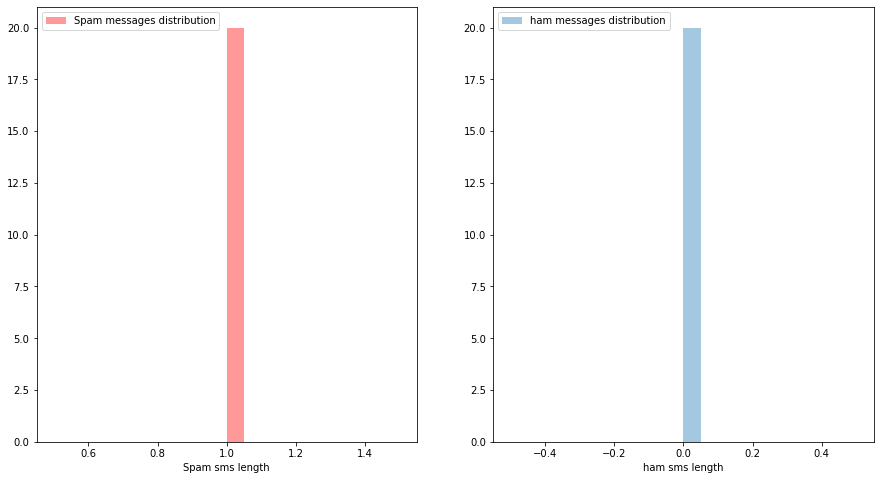

In [22]:

# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['malignant']==1]['malignant'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['malignant']==0]['malignant'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

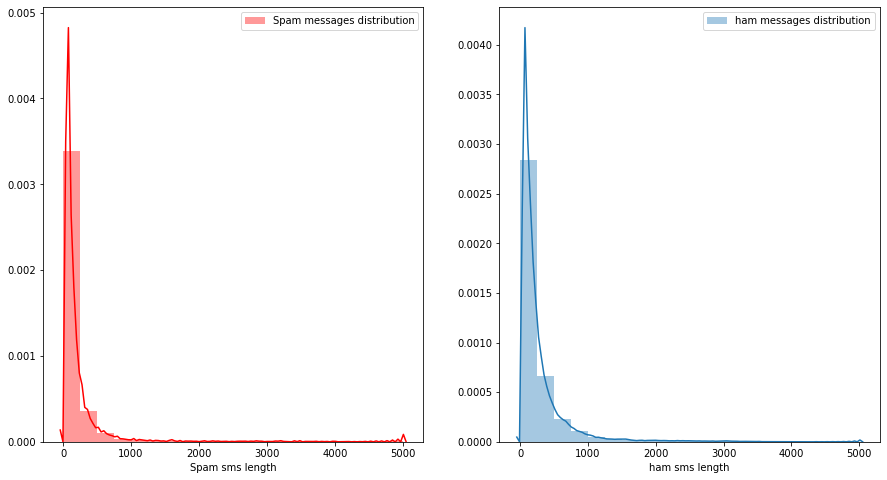

In [23]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['malignant']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['malignant']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

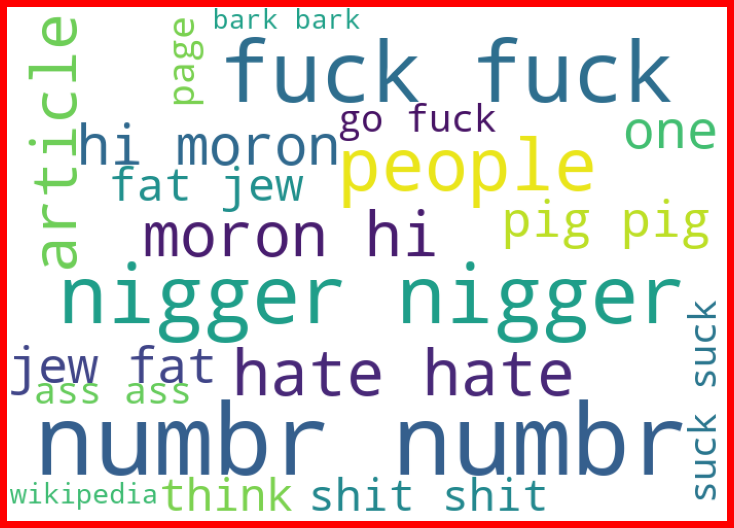

In [24]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud
spams = df['comment_text'][df['malignant']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

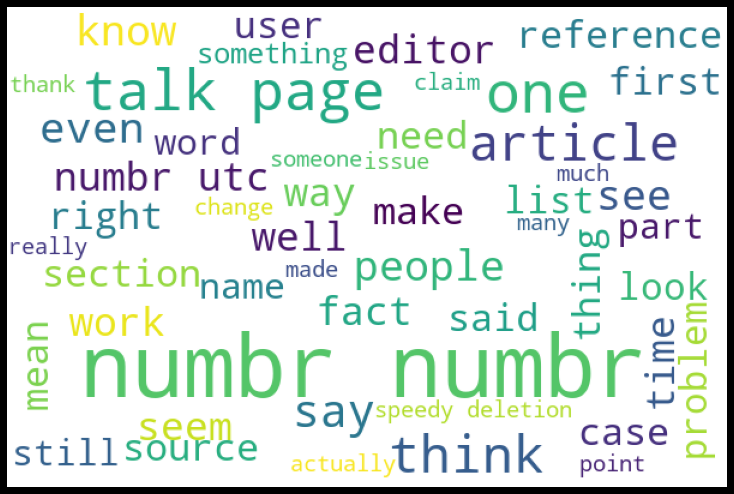

In [25]:
#Getting sense of loud words in ham 

hams = df['comment_text'][df['malignant']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [26]:
tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['comment_text'])
features1 = tf_vec.transform(df1['comment_text'])

X = features
X1 = features1

y = df['malignant']

In [27]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9202617000476274


In [28]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     36078
           1       0.98      0.17      0.29      3815

    accuracy                           0.92     39893
   macro avg       0.95      0.58      0.62     39893
weighted avg       0.93      0.92      0.89     39893



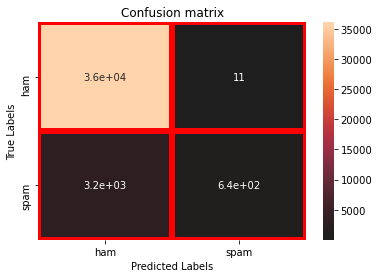

In [30]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [31]:
conf_mat

array([[36067,    11],
       [ 3170,   645]], dtype=int64)

In [32]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [33]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 98.32%
Recall: 16.91%


In [34]:
joblib.dump(naive,'malignant.pkl')

['malignant.pkl']

In [35]:
model=joblib.load('malignant.pkl')

In [36]:
y1= model.predict(X1)

In [37]:
df1['malignant']=y1
df1

,id,comment_text,malignant
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,0
1,0000247867823ef7,rfc title fine imo,0
2,00013b17ad220c46,sources zawe ashton lapland,0
3,00017563c3f7919a,look back source information updated correct f...,0
4,00017695ad8997eb,anonymously edit articl,0
...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,0
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,0
153161,fffda9e8d6fafa9e,okinotorishima categories see changes agree co...,0
153162,fffe8f1340a79fc2,one founding nations eu germany law return qui...,0


In [38]:
print ('non-malignant and malgnant counts','\n',df1.malignant.value_counts())

non-malignant and malgnant counts 
 0    147764
1      5400
Name: malignant, dtype: int64
